DATA UNDERSTANDING STAGE1 مرحلة فهم البيانات

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("http://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv")

In [3]:
#Data dimensions أبعاد البيانات
df.shape

(429435, 67)

In [4]:
# الأعمدة Columns
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429435 entries, 0 to 429434
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    429435 non-null  object 
 1   continent                                   402910 non-null  object 
 2   location                                    429435 non-null  object 
 3   date                                        429435 non-null  object 
 4   total_cases                                 411804 non-null  float64
 5   new_cases                                   410159 non-null  float64
 6   new_cases_smoothed                          408929 non-null  float64
 7   total_deaths                                411804 non-null  float64
 8   new_deaths                                  410608 non-null  float64
 9   new_deaths_smoothed                         409378 non-null  float64
 

MISSING VALUES PROCESSING معالجة القيم المفقودة

In [6]:
#Sort columns in descending order by number of missing values ترتيب الأعمدة تنازلياً حسب عدد القيم المفقودة
df.isnull().sum().sort_values(ascending = False).head(30)

,0
weekly_icu_admissions,418442
weekly_icu_admissions_per_million,418442
excess_mortality,416024
excess_mortality_cumulative_absolute,416024
excess_mortality_cumulative,416024
excess_mortality_cumulative_per_million,416024
weekly_hosp_admissions,404938
weekly_hosp_admissions_per_million,404938
icu_patients_per_million,390319
icu_patients,390319


drop columns with huge amount of missing **value** حذف الأعمدة ذات  نسبة عالية من القيم المفقودة

In [7]:
#حذف أعلى أعمدة بالقيم المفقودة
columns_to_drop = [
    "icu_patients", "icu_patients_per_million", "weekly_icu_admissions",
    "weekly_icu_admissions_per_million", "weekly_hosp_admissions",
    "weekly_hosp_admissions_per_million", "excess_mortality",
    "excess_mortality_cumulative", "excess_mortality_cumulative_absolute",
    "excess_mortality_cumulative_per_million",'hosp_patients_per_million','hosp_patients'
]
df = df.drop(columns=columns_to_drop)

the frame after drop columns

In [8]:
df.isnull().sum().sort_values(ascending = False).head(30)
# مازال يوجد أعمدة ذات نسبة عالية من القيم مفقودة

,0
total_boosters,375835
total_boosters_per_hundred,375835
new_vaccinations,358464
new_tests,354032
new_tests_per_thousand,354032
people_fully_vaccinated,351374
people_fully_vaccinated_per_hundred,351374
total_tests_per_thousand,350048
total_tests,350048
people_vaccinated_per_hundred,348303


### `DUBLICATED VALUES القيم المكررة `

In [9]:
df.duplicated().sum()
#لايوجد قيم مكررة

np.int64(0)

In [10]:
df.shape

(429435, 55)

PERIOD TO STUDY الفترة الزمنية المدروسة

In [11]:
# Youngest date أصغر تاريخ
print(df['date'].min())

2020-01-01


In [12]:
#Highest date أعلى تاريخ
print(df['date'].max())

2024-08-14


 Geographical Extension الامتداد الجغرافي   

In [13]:
# Number of studied countries عدد الدول المدروسة

df['location'].nunique()

255

In [14]:
# Number of continents عدد القارات
df['continent'].nunique()

6

In [15]:
df['location'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'East Timor',
       'Ecuador', 'Egypt', 'El Salvador', 'England', 'Equatorial Guine

In [16]:
df['continent'].unique()

array(['Asia', nan, 'Europe', 'Africa', 'Oceania', 'North America',
       'South America'], dtype=object)

We notice the presence of geographical clusters نلاحظ وجود تجمعات جغرافية

In [17]:
to_remove = ["World", "Asia", "Europe", "Africa", "Oceania", "High income",
             "Upper middle income", "Lower middle income", "Low income",
             "European Union","European Union (27)","North America","South America", 'High-income countries','Low-income countries',
             'Lower-middle-income countries','Upper-middle-income countries']

df = df[~df['location'].isin(to_remove)]

In [18]:
df = df[~df['location'].isin(to_remove)].copy()

In [19]:
#Number of countries after removing blocs عدد الدول بعد حذف التكتلات
df['location'].nunique()

243

top 10 countries by total deaths latest date
أعلى 10 دول من حيث إجمالي الوفيات حسب آخر تاريخ





In [20]:
df_date_sorted = df.sort_values("date")

df_last_loc = df_date_sorted.drop_duplicates("location", keep="last")


df_top_ten = df_last_loc[["location", "total_deaths"]].dropna().sort_values(ascending=False, by="total_deaths").head(10)

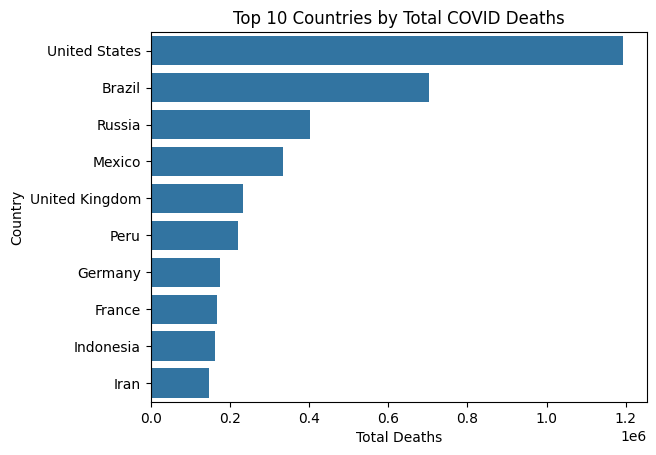

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=df_top_ten, x='total_deaths', y='location')
plt.title('Top 10 Countries by Total COVID Deaths')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.show()

أعلى 10 دول من حيث معدل الوفيات حسب أحدث تاريخ الأخير top 10 countries by  Deaths Rate latest date

In [22]:
df["death_rate"] = df["total_deaths"]/df["total_cases"]

In [23]:
df_date_sorted = df.sort_values("date").drop_duplicates("location", keep="last")

df_top_10 = df_date_sorted[["location", "death_rate"]].dropna().sort_values(ascending=False, by="death_rate").head(10)

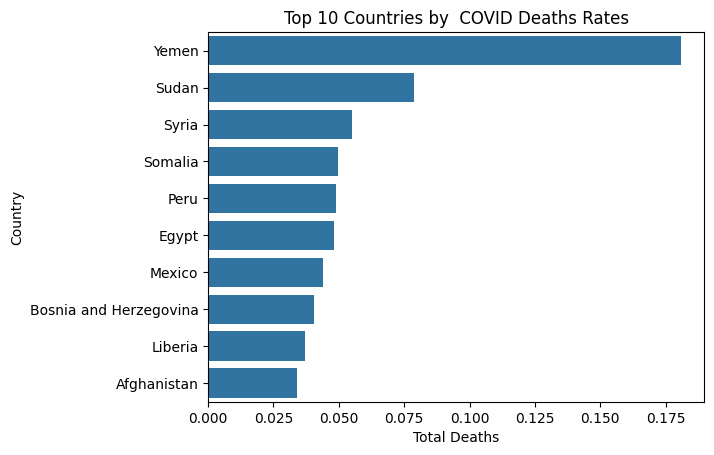

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(data=df_top_10, x='death_rate', y='location')
plt.title('Top 10 Countries by  COVID Deaths Rates')
plt.xlabel('Total Deaths')
plt.ylabel('Country')
plt.show()

In [25]:
df['death_rate'].head()

,death_rate
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


أعلى 10 دول من حيث معدل الوفيات top 10 countries by Deaths Rate

In [26]:
df['death_rate'].isnull().sum()

np.int64(40260)

In [27]:
df = df.dropna(subset = 'death_rate')

In [28]:
df['death_rate'].isnull().sum()

np.int64(0)

In [29]:
df = df[df["death_rate"] != float('inf')]

In [30]:
df = df[df["death_rate"] < 1]  # إذا كان في قيم غير منطقية

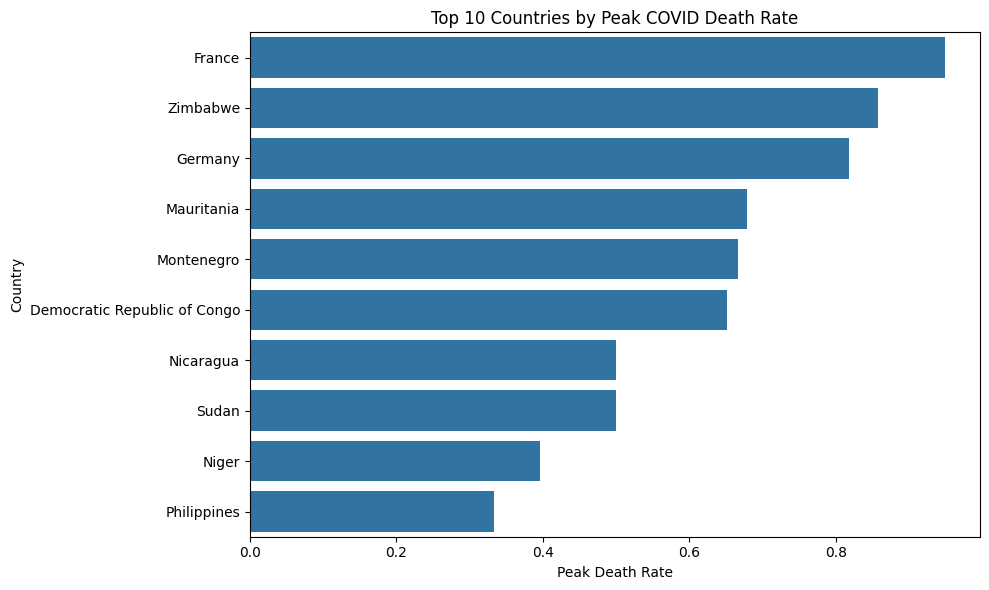

In [31]:
df_peak_death_rate = df.sort_values('death_rate', ascending=False).drop_duplicates('location')


# اختيار أقل 10 دول
top10_peak = df_peak_death_rate.head(10)

# الرسم
plt.figure(figsize=(10, 6))
sns.barplot(data=top10_peak, x='death_rate', y='location')
plt.title('Top 10 Countries by Peak COVID Death Rate')
plt.xlabel('Peak Death Rate')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [33]:
df_peak_death_rate.shape

(232, 56)

In [34]:
import numpy as np

In [35]:
df_low_death_rate = df_peak_death_rate[np.logical_and(df_peak_death_rate["death_rate"]>0, df_peak_death_rate["death_rate"]<0.002)]

In [36]:
df_low_death_rate.shape

(9, 56)

In [37]:
df_low_death_rate.shape

(9, 56)

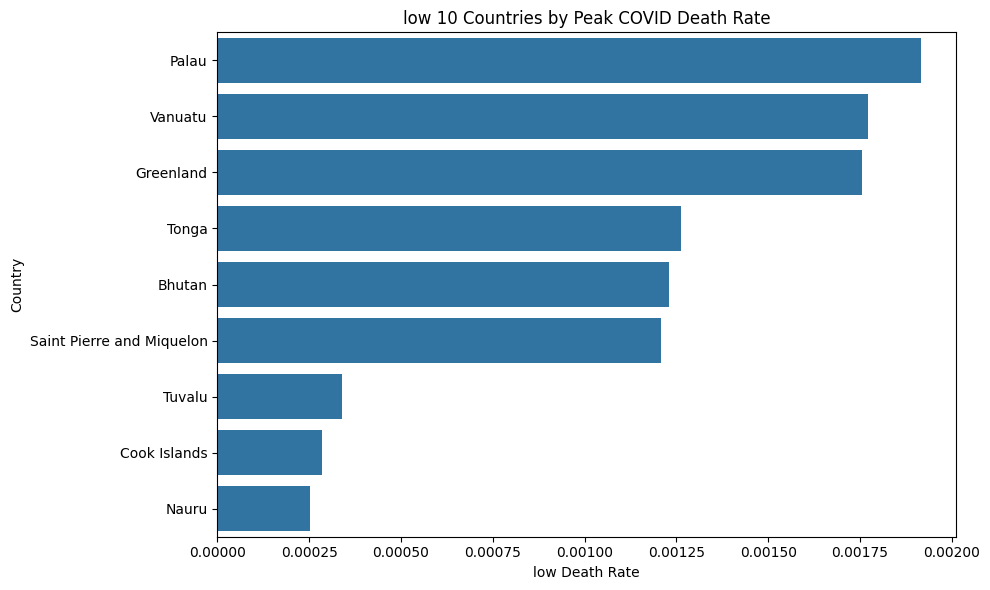

In [38]:
# الرسم
plt.figure(figsize=(10, 6))
sns.barplot(data=df_low_death_rate, x='death_rate', y='location')
plt.title('low 10 Countries by Peak COVID Death Rate')
plt.xlabel('low Death Rate')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [39]:
df_low_death_rate

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,death_rate
293420,PLW,Oceania,Palau,2022-02-16,3133.0,0.0,82.43,6.0,0.0,0.86,...,NaN,15.89,7.7,22.7,NaN,4.8,73.70,0.83,18084,0.001915
414015,VUT,Oceania,Vanuatu,2022-05-09,7907.0,0.0,56.29,14.0,0.0,0.14,...,546.30,12.02,2.8,34.5,25.21,NaN,70.47,0.61,326744,0.001771
148297,GRL,North America,Greenland,2023-04-09,11971.0,0.0,0.00,21.0,0.0,0.00,...,199.94,2.16,NaN,NaN,NaN,NaN,71.70,NaN,56494,0.001754
385858,TON,Oceania,Tonga,2022-04-05,7127.0,0.0,219.43,9.0,0.0,1.00,...,227.49,15.42,11.8,44.4,NaN,2.6,70.91,0.72,106867,0.001263
42239,BTN,Asia,Bhutan,2021-01-14,813.0,0.0,13.86,1.0,0.0,0.14,...,217.07,9.75,NaN,NaN,79.81,1.7,71.78,0.65,782457,0.001230
328565,SPM,North America,Saint Pierre and Miquelon,2022-02-07,828.0,0.0,28.57,1.0,0.0,0.14,...,NaN,NaN,NaN,NaN,NaN,NaN,81.07,NaN,5885,0.001208
396394,TUV,Oceania,Tuvalu,2023-08-10,2943.0,0.0,0.00,1.0,0.0,0.00,...,NaN,27.25,NaN,NaN,NaN,NaN,67.57,NaN,11335,0.000340
81499,COK,Oceania,Cook Islands,2023-02-11,7019.0,0.0,2.86,2.0,0.0,0.14,...,NaN,NaN,NaN,NaN,NaN,NaN,76.25,NaN,17032,0.000285
263027,NRU,Oceania,Nauru,2022-07-08,3970.0,0.0,223.57,1.0,0.0,0.14,...,NaN,24.07,43.0,36.9,NaN,5.0,59.96,NaN,12691,0.000252


In [40]:
df['death_rate'].isnull().sum()


np.int64(0)

اكتشاف الأنماط عن طريق مقارنة العوامل

In [41]:
#إضافة عمود يحدد فئة الدولة
top10_peak['group'] = 'High'
df_low_death_rate['group'] = 'Low'

df_compare = pd.concat([top10_peak,df_low_death_rate],ignore_index = True)
print (df_compare.head())

  iso_code continent    location        date  total_cases  new_cases  \
0      FRA    Europe      France  2020-07-08      20456.0        0.0   
1      ZWE    Africa    Zimbabwe  2020-04-01          7.0        0.0   
2      DEU    Europe     Germany  2020-02-03         11.0        0.0   
3      MRT    Africa  Mauritania  2020-05-28        227.0        0.0   
4      MNE    Europe  Montenegro  2020-06-05          3.0        0.0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0              332.00       19422.0         0.0                14.29  ...   
1                0.71           6.0         0.0                 0.14  ...   
2                1.29           9.0         0.0                 0.43  ...   
3               26.71         154.0         0.0                 0.71  ...   
4                0.00           2.0         0.0                 0.00  ...   

   diabetes_prevalence  female_smokers  male_smokers  handwashing_facilities  \
0                 4.77  

/tmp/ipython-input-2224076719.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top10_peak['group'] = 'High'
/tmp/ipython-input-2224076719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_low_death_rate['group'] = 'Low'


In [42]:
df_compare.shape

(19, 57)

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

def compare_factor(data, column, target_col='death_rate', group_col='group'):
    """
    data       : DataFrame
    column     : اسم العمود (العامل)  (string)
    target_col : العمود المستهدف للمقارنة (افتراضياً 'death_rate')
    group_col  : عمود تقسيم المجموعات (افتراضياً 'group')
                  يحتوي قيم  'Low' أو 'High'
    """

    plt.figure(figsize=(18,5))

    # Boxplot
    plt.subplot(1,3,1)
    sns.boxplot(data=data, x=group_col, y=column)
    plt.title(f"Boxplot of {column} by {group_col}")

    # Barplot (متوسطات)
    plt.subplot(1,3,2)
    sns.barplot(data=data, x=group_col, y=column, estimator='mean')
    plt.title(f"Average {column} by {group_col}")

    # Scatter plot
    plt.subplot(1,3,3)
    sns.scatterplot(data=data, x=column, y=target_col, hue=group_col, alpha=0.7)
    plt.title(f"{column} vs {target_col} by {group_col}")

    plt.tight_layout()
    plt.show()


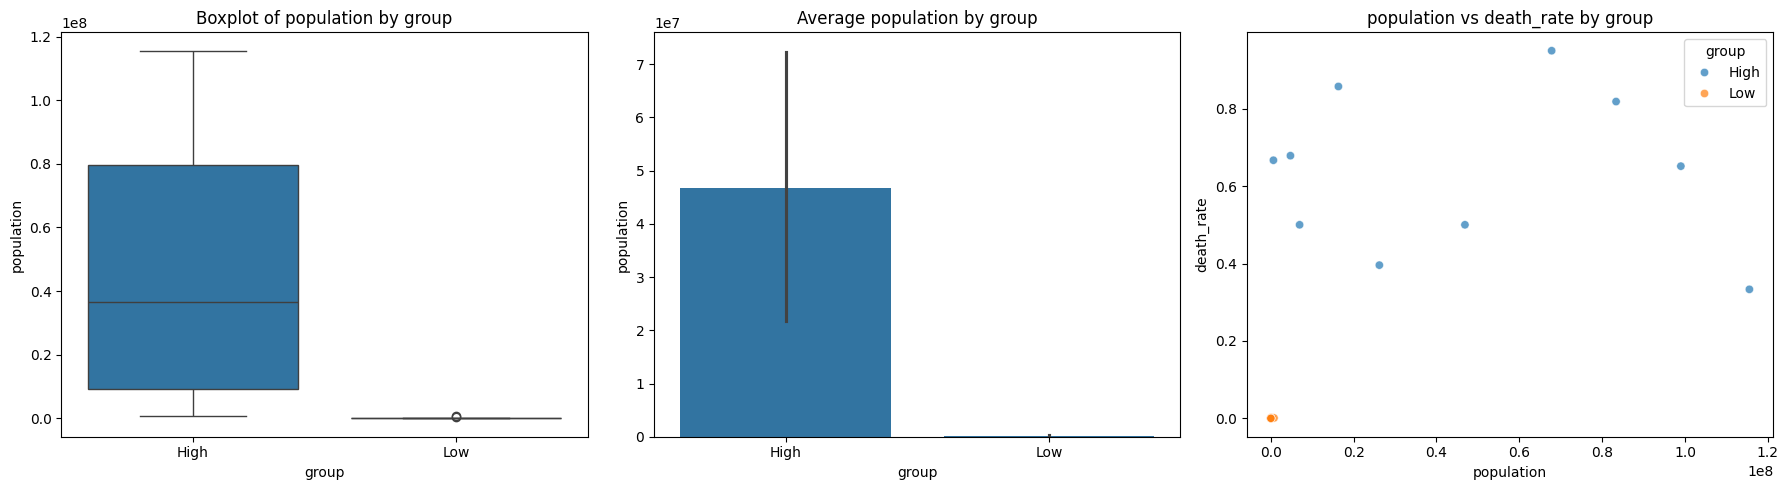

In [44]:
# : مقارنة عامل عدد السكان
compare_factor(df_compare, 'population')



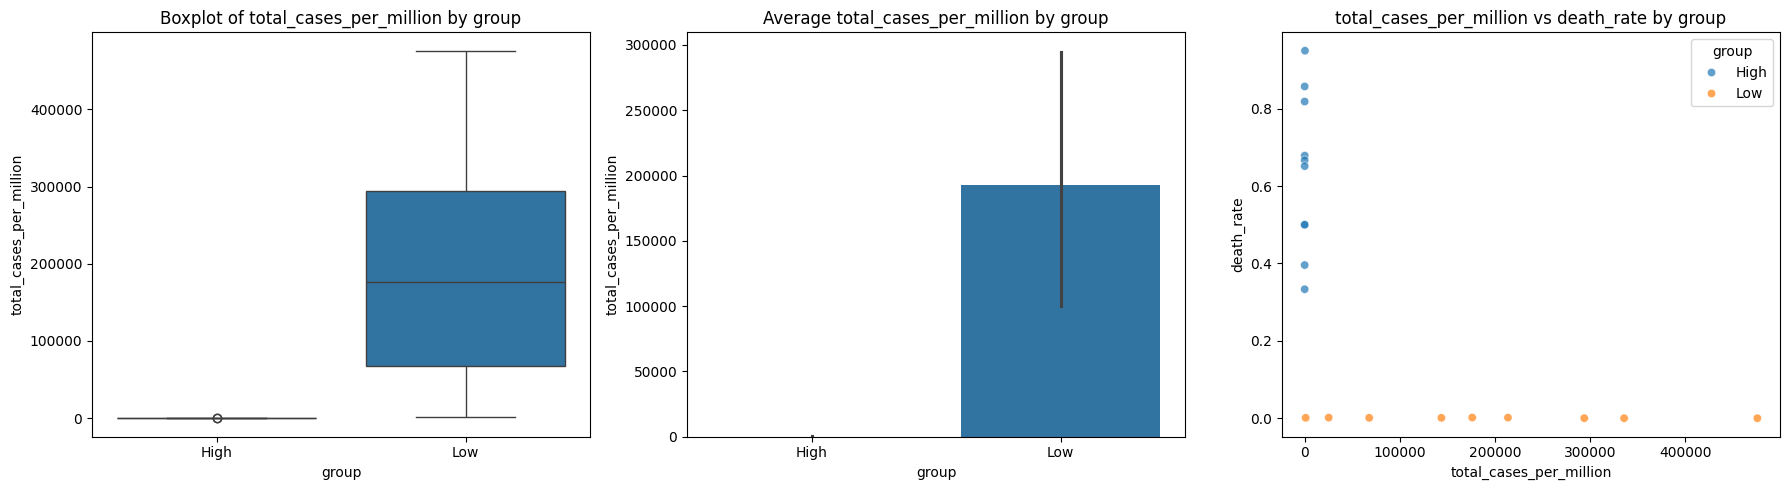

In [45]:
# مثال: مقارنة الحالات لكل مليون
compare_factor(df_compare, 'total_cases_per_million')

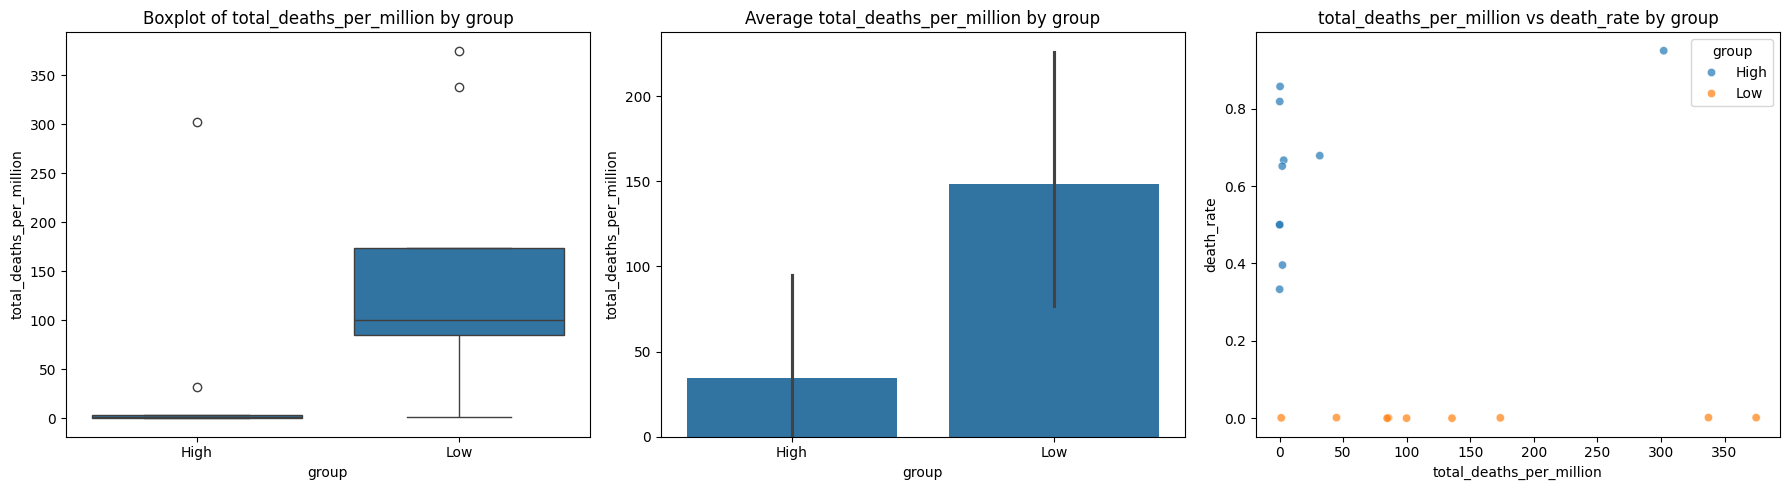

In [46]:
# مثال: مقارنة الوفيات لكل مليون
compare_factor(df_compare, 'total_deaths_per_million')

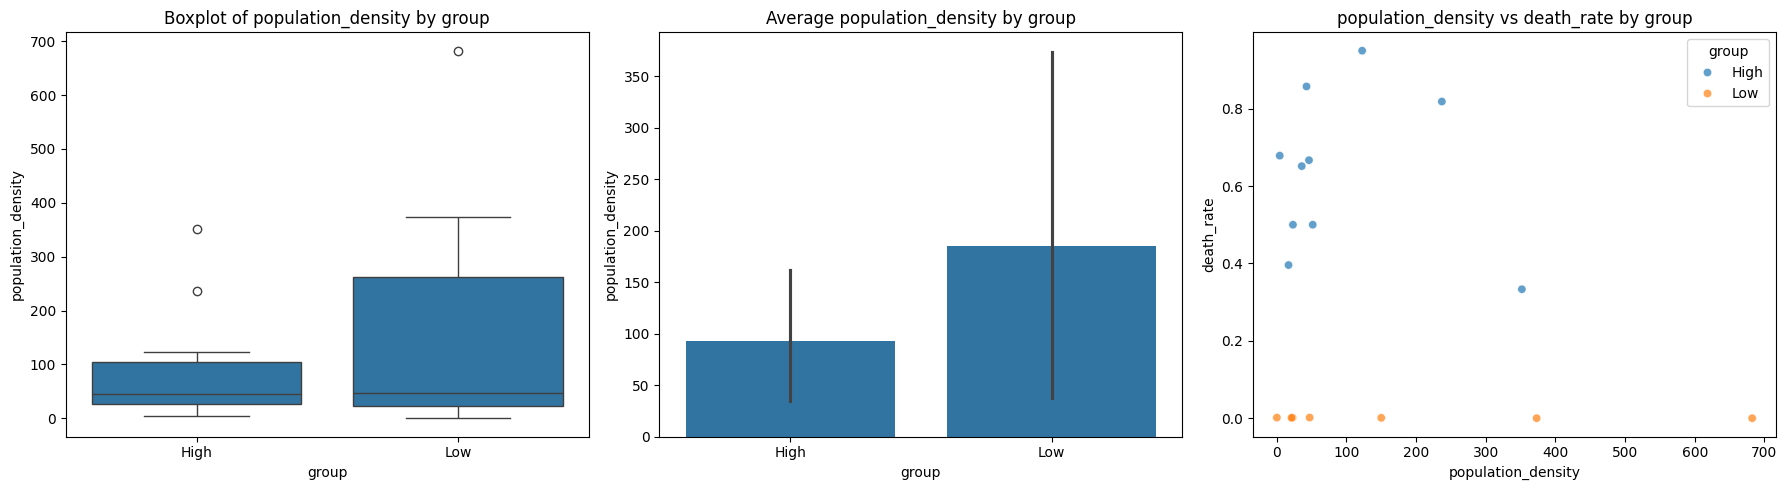

In [47]:
# مثال: مقارنة الكثافة السكانية
compare_factor(df_compare, 'population_density')


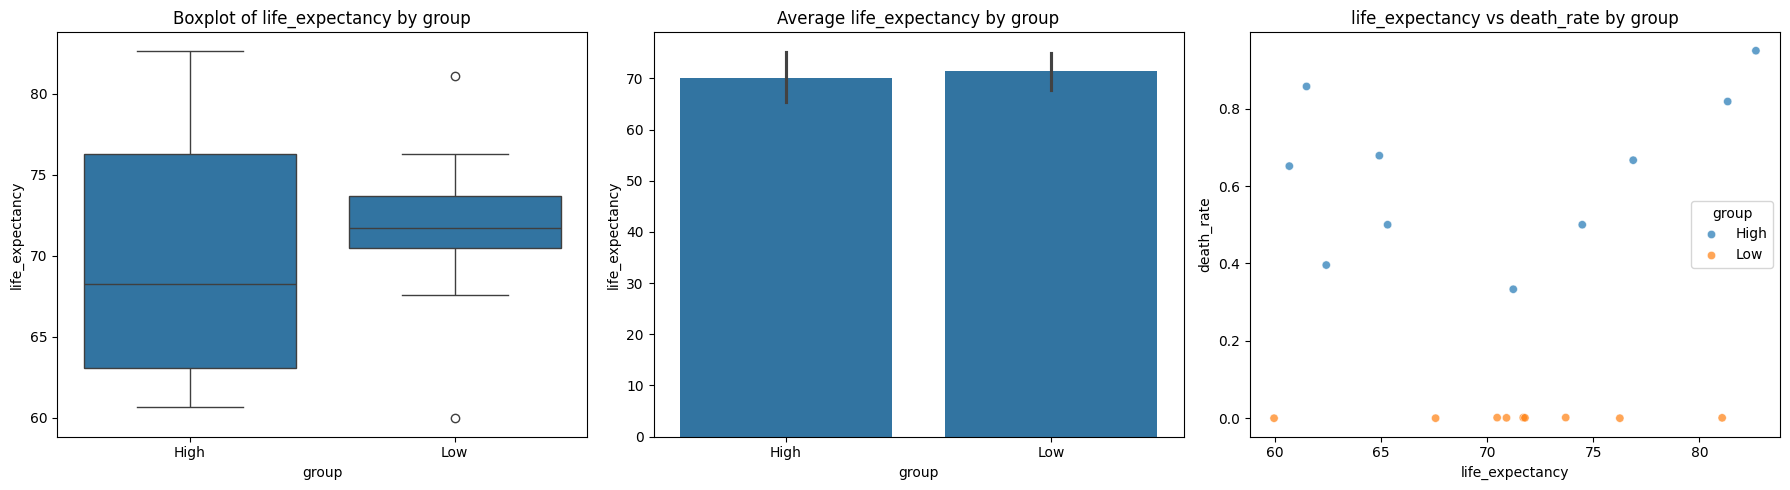

In [48]:
#مقارنة عامل متوسط ​​العمر المتوقع
compare_factor(df_compare, 'life_expectancy')
